# Trabajo Final
## 1.Inicializando Librerías
Para realizar nuestro trabajo utilizaremos las siguientes librerías: Usaremos Numpy para poder utilizar su estructura de arreglos; con Matplotlib graficaremos la información de forma más sencilla. Por último, utilizaremos pandas para poder leer el dataset propuesto por el trabajo y para almacenarlo en su estructura de dataframes.

In [29]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## 2.Lectura del Dataset
El trabajo propuesto por el curso de machine learning nos plantea entrenar un modelo que pueda clasificar correctamente si un correo electrónico es de categoria spam o lo contrario. Para ello se nos entregó un dataset clasico de SPAM OR NOT SPAM, que contiene 2500 'ham' (es decir, no spam) y 500 correos electrónicos no deseados en el conjunto de datos. También puede notar que todos los números y URL se convirtieron en cadenas como NUMBER y URL respectivamente. Este es el conjunto de datos simplificado de spam y ham. Este dataset contiene las siguientes variables:


In [30]:
df = pd.read_csv('dataset.csv', encoding = "ISO-8859-1")

Una vez hayamos cargado el dataset, procedemos a visualizar los datos.

## 3. Análisis Exploratorio y Tratamiento de Datos

### 3.1- Visualizacion Corta del Dataframe
Lo primero que se decidió hacer fue ver el estado del dataframe, por lo que usamos la función head() de pandas. Se puede visualizar todas las columnas, y las primeras 5 filas.


In [31]:
df.head(5)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


### 3.2- Magnitud del Dataset
Luego, para tener una idea de la magnitud del dataset con el que se está trabajando, usamos la función shape() de Pandas para que nos retorne el número de filas y columnas de dicho dataset. El primer axis son el numero de filas y la segunda de las columnas. Tambien mostraremos como estan estructurados nuestros datos. Es decir la distribución de los valores del dominio de nuestro dataset; 0 para no SPAM y 1 para SPAM.

In [32]:
df.shape

(3000, 2)

In [33]:
df['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

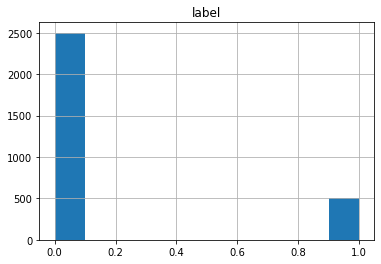

In [34]:
df.hist();

In [35]:
spam = df[df['label']== 1]
spam.head()

ham = df[df['label']== 0]
ham.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


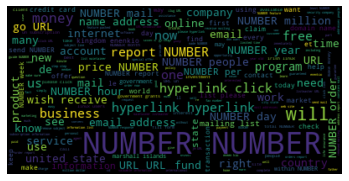

In [36]:
text_spam = " ".join(str(review) for review in spam.email)

wordcloud = WordCloud().generate(text_spam)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

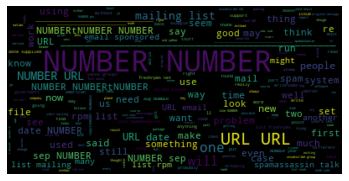

In [37]:
text_ham = " ".join(review for review in ham.email)

wordcloud = WordCloud().generate(text_ham)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 3.3 - Valores Nulos
Es un paso crucial ver si existen valores nulos en el dataset que se va a usar,por lo tanto, usando la función isna(), mas sumando todo con sum(), podemos sumar la cantidad de valores nulos por cada columnas de DF. En este caso, podemos ver que la de los correos tiene 1 valor unico.

In [38]:
df.isna().sum() #Detección de valores nulos

email    1
label    0
dtype: int64

### 3.4 Tipos de Atributos
Es muy importante, antes de empezar a trabajar con la data de un dataset, saber qué tipos de atributos contiene. Para esto, se hizo uso de la función dtypes() de pandas, que , por cada columna, me retorna su tipo de dato.

In [39]:
df.dtypes

email    object
label     int64
dtype: object


Podemos ver que la columna importante de 'email' esta en tipo Object, lo que nos dice que el dataset no está listo para poder entrenarlo. Esto se arreglara posteriormente.

Para poder ver las estadísticas de las columnas numéricas, se hizo uso de la función describe() de pandas una vez más. Como podemos ver, solo toma en cuenta las columnas que están en tipos numéricos, es decir int o float. En este caso es solo los labels (clases).

In [40]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### 3.5 Distribución Aleatoria de los datos
Usando la función Shuffle de Sklearn distribuiremos los datos para que los datos no esten ordenados y podemos partirlos posteriormente.

In [41]:
df = shuffle(df)

## 4 - Tratamiento de Datos


### 4.1 - Descartando Valores Faltantes
Como se analizó previamente, en la sección de exploración de datos, había un registro con valor nulo en la columna de 'email'. Para solucionar esto, como nos dimos cuenta que habían suficientes registros en el dataset, y que solo era un registro, decidimos descartar esa filas que contenía dicho valor nulo. Entonces, lo que decidimos hacer fue usar la funcion dropna() de libreria Pandas, que fue cargada previamente.

In [42]:
df = df.dropna()

Hacemos una simple verificacion que efectivamente se borro el registro nulo y podemos ver que efectivamente lo hizo.

In [43]:
df.isna().sum()

email    0
label    0
dtype: int64

### 4.2 - Data Cleaning and preparation

Partimos el dataset en data de entrenamiento y de prueba para poder empezar a enviarlos a los modelos escogidos dentro del alcance de este trabajo.

In [44]:
x = []
y = []
for index,row in df.iterrows():
  df['email'][index] = df['email'][index].replace('NUMBER','')
  df['email'][index] = df['email'][index].replace('hyperlink','')
  df['email'][index] = df['email'][index].replace('URL','')

  df['email'][index] = df['email'][index].replace(r'\r', ' ')
  df['email'][index] = df['email'][index].replace(r'\n', ' ')
  df['email'][index] = df['email'][index].replace('[^a-zA-Z0-9]', ' ')

  x.append(df['email'][index])
  y.append(df['label'][index])

print(len(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is try

2999


In [45]:
spam = df[df['label']== 1]
spam.head()

ham = df[df['label']== 0]
ham.head()

,email,label
1391,justin mason jm jmason org well my poin...,0
2249,url date not supplied the president s niece w...,0
29,update on this for anyone that s interested an...,0
1274,once upon a time ville wrote i assume that you...,0
952,chris garrigues said done i also eliminated t...,0


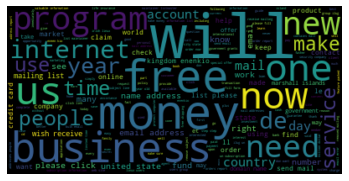

In [46]:
text_spam = " ".join(str(review) for review in spam.email)

wordcloud = WordCloud().generate(text_spam)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

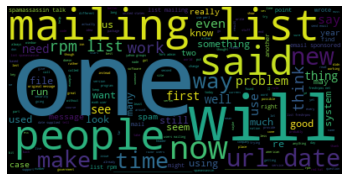

In [47]:
text_ham = " ".join(review for review in ham.email)

wordcloud = WordCloud().generate(text_ham)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
df.head()

,email,label
1391,justin mason jm jmason org well my poin...,0
2249,url date not supplied the president s niece w...,0
2670,lowest rates available for term life insurance...,1
29,update on this for anyone that s interested an...,0
1274,once upon a time ville wrote i assume that you...,0


###4.3 - Holdout Sets

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0, shuffle = True)
print(x_test)

['url  date   t     pm rules out compromise on public service reform in hard hitting pre conference interview ', 'on wed  sep  vince puzzella wrote ever since i set defang_mime  all spam that contains html has a badly formatted report i think realize it s because the report should be in html is there anyway to get spamassassin to add an html report in cases where it is required defang_mime  funny i was in the middle of composing the same message when i saw yours it would be nice if it sees a header like content type text html charset iso   and defang_mime is  it could wrap the report with pre pre for ease of reading and the same sort of problem seems to occur with base encoded messages the report is placed inside of the mime boundary _nextpart__b_eab be content type text plain charset iso   content transfer encoding base should this not go above probably in it s own mime section to make sure that the attachments don t get destroyed ian ian white email iwhite  in remembrance  __________

### 4.4 - TFIDF

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()#ngram_range=(1,1),stop_words='english')
x_train_data = vec.fit_transform(x_train)
x_train_df = pd.DataFrame(data = x_train_data.toarray(),columns=vec.get_feature_names())

In [51]:
# x_train_df.head()

### 4.5 - PCA

Disminuiremos el número de columnas, con fin de buscar optimizar los tiempos de ejecución de nuestros modelos.

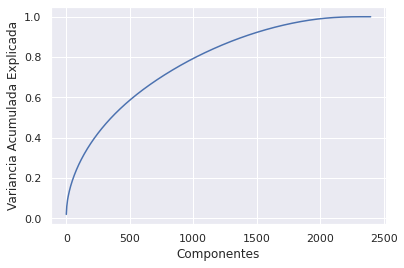

In [182]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Componentes')
plt.ylabel('Variancia Acumulada Explicada');

In [183]:
#pca = PCA(n_components=1000)
#principalComponents = pca.fit_transform(x_train_df)
#x_train_w_pca = pd.DataFrame(data = principalComponents)

## 5.- Elección de Modelos a Utilizar
###Hallando los mejores parámetros para cada modelo

### 5.1 - K-Nearest Neighbors Model
Se seleccionó el algoritmo KNN porque es uno de los algoritmos de clasificación más simples y es uno de los algoritmos de aprendizaje más utilizados.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

neighbors = 0
clf_knn = Pipeline([('tfidf', TfidfVectorizer()),('Knn', KNeighborsClassifier(n_neighbors=neighbors))])
clf_knn.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('Knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

Maximum accuracy: 0.96 at K = 34


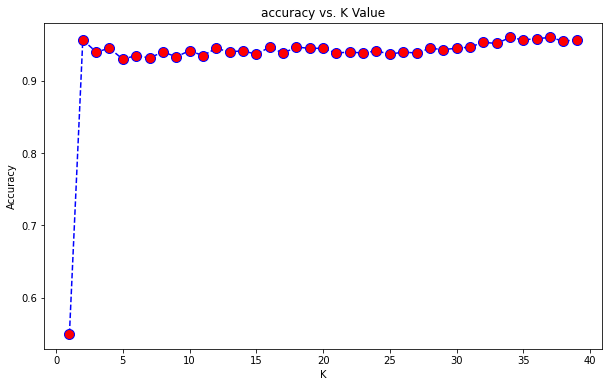

In [55]:
acc = []

for i in range(1,40):
    clf_knn_aux = Pipeline([('tfidf', TfidfVectorizer()),('Knn', KNeighborsClassifier(n_neighbors=i))])
    clf_knn_aux.fit(x_train, y_train)
    y_pred = clf_knn_aux.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10);
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))+1)

In [128]:
clf_knn_mod = Pipeline([('tfidf', TfidfVectorizer()),('Knn', KNeighborsClassifier(n_neighbors=34))])
clf_knn_mod = clf_knn_mod.fit(x_train,y_train)
y_pred_KNN = clf_knn_mod.predict(x_test)
accuracy_score(y_test, y_pred_KNN)

0.96

In [57]:
clf_knn_mod.predict(['dear ricardoNUMBER cost effective direct email advertising promote your business for as low as NUMBE'])

array([1])

In [58]:
confusion_matrix(y_test, y_pred_KNN)

array([[477,  12],
       [ 15,  96]])

### 5.2 - Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

clf_lr = Pipeline([('tfidf', TfidfVectorizer()),('clf_lr', LogisticRegression())])
clf_lr.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf_lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scal

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Maximum accuracy: 0.9533333333333334 at Iter = 1


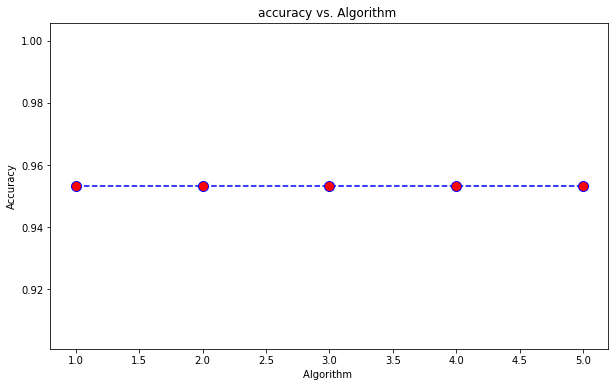

In [60]:
acc = []
algors = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]

for i in range(len(algors)):
    clf_lr_aux = Pipeline([('tfidf', TfidfVectorizer()),('clf_lr', LogisticRegression(solver = algors[i]))])
    clf_lr_aux.fit(x_train, y_train)
    y_pred = clf_lr_aux.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,6),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10);
plt.title('accuracy vs. Algorithm ')
plt.xlabel('Algorithm ')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at Iter =",(acc.index(max(acc))+1))

In [124]:
clf_lr_mod = Pipeline([('tfidf', TfidfVectorizer()),('clf_lr', LogisticRegression())])
clf_lr_mod.fit(x_train,y_train)
y_pred_lr = clf_lr_mod.predict(x_test)
accuracy_score(y_test, y_pred_lr)

0.9533333333333334

In [62]:
confusion_matrix(y_test, y_pred_lr)

array([[489,   0],
       [ 28,  83]])

### 5.3 - XGBoost Model
Siguiendo la linea de la investigación realizada, encontramos en el modelo de XGboost una opción más sofisticada y mas controlable de Logistic Regression. Por ello la proponemos como una opción mejorada del modelo anterior que nos permita jugar más con los hiper-parámetros.

In [63]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

clf_xgb = Pipeline([('tfidf', TfidfVectorizer()),('Xgb', xgb.XGBClassifier(learning_rate =0.1,
									n_estimators=1000,
									max_depth=5,
									min_child_weight=1,
									gamma=0,
									subsample=0.8,
									colsample_bytree=0.8,
									objective= 'binary:logistic',
									scale_pos_weight=1))])
clf_xgb.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=5,
                      

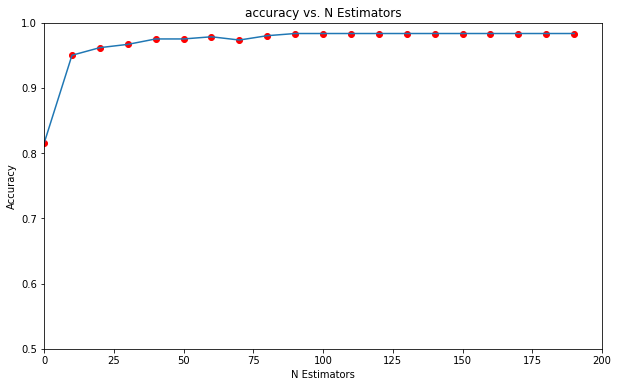

Maximum accuracy:  0.9833333333333333 at Estimator with N = 90


In [64]:
result_xgb_ac=[]
result_xgb_n_estimators=[]
for i in range(0,200,10):
    clf_xgb_tmp = Pipeline([('tfidf', TfidfVectorizer()),('Xgb', xgb.XGBClassifier(learning_rate =0.1,
									n_estimators=i,
									max_depth=5,
									min_child_weight=1,
									gamma=0,
									subsample=0.8,
									colsample_bytree=0.8,
									objective= 'binary:logistic',
									scale_pos_weight=1))])
    clf_xgb_tmp.fit(x_train, y_train)
    y_XGB = clf_xgb_tmp.predict(x_test)
    aux_score = accuracy_score(y_test, y_XGB)
    result_xgb_ac+=[aux_score]
    result_xgb_n_estimators+=[i]

plt.figure(figsize=(10,6))
plt.scatter(result_xgb_n_estimators, result_xgb_ac, c='r')
plt.plot(result_xgb_n_estimators, result_xgb_ac)
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')
plt.xlim(0, 200)
plt.ylim(0.5, 1.0)
plt.title('accuracy vs. N Estimators')
plt.show()
print("Maximum accuracy: ",max(result_xgb_ac),"at Estimator with N =",result_xgb_n_estimators[result_xgb_ac.index(max(result_xgb_ac))])

In [86]:
clf_xgb_mod = Pipeline([('tfidf', TfidfVectorizer()),('Xgb', xgb.XGBClassifier(learning_rate =0.1,
									n_estimators=90,
									max_depth=5,
									min_child_weight=1,
									gamma=0,
									subsample=0.8,
									colsample_bytree=0.8,
									objective= 'binary:logistic',
									scale_pos_weight=1))])
clf_xgb_mod.fit(x_train, y_train)
y_pred_XGB = clf_xgb_mod.predict(x_test)
accuracy_score(y_test, y_pred_XGB)

0.9833333333333333

In [87]:
clf_xgb_mod.predict(['NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER'])

array([1])

In [88]:
confusion_matrix(y_test, y_pred_XGB)

array([[486,   3],
       [  7, 104]])

### 5.4 - Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

estimators = 1
clf_rfst = Pipeline([('tfidf', TfidfVectorizer()),('clf_rfst', RandomForestClassifier(n_estimators=estimators, n_jobs=-1))])
clf_rfst.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Maximum accuracy: 0.9733333333333334 at N = 61


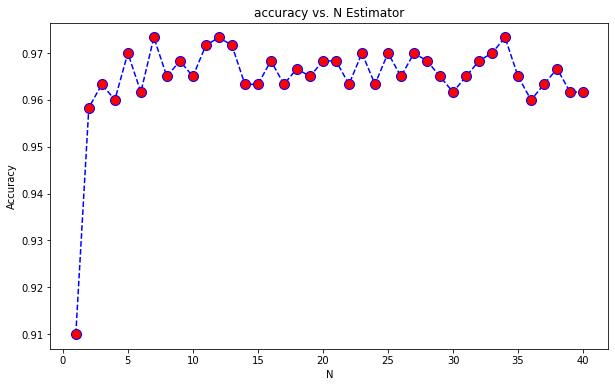

In [92]:
acc = []

for i in range(1,400,10):
    clf_rfst_aux = Pipeline([('tfidf', TfidfVectorizer()),('clf_rfst', RandomForestClassifier(n_estimators=i, n_jobs=-1))])
    clf_rfst_aux.fit(x_train, y_train)
    y_pred_aux = clf_rfst_aux.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred_aux))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,41),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10);
plt.title('accuracy vs. N Estimator')
plt.xlabel('N')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at N =",(acc.index(max(acc))*10)+1)

In [102]:
clf_rfst_mod = Pipeline([('tfidf', TfidfVectorizer()),('clf_rfst', RandomForestClassifier(n_estimators=61, n_jobs=-1))])
clf_rfst_mod.fit(x_train, y_train)
y_pred_rfst = clf_rfst_mod.predict(x_test)
accuracy_score(y_test, y_pred_rfst)

0.975

In [129]:
clf_rfst_mod.predict(['porn'])

array([1])

In [130]:
confusion_matrix(y_test, y_pred_rfst)

array([[488,   1],
       [ 14,  97]])

### 5.5 - Multinomial Naive Bayes

In [105]:
from sklearn.naive_bayes import MultinomialNB

clf_multiNB = Pipeline([('tfidf',TfidfVectorizer()), ('clf_multiNB', MultinomialNB())])
clf_multiNB.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf_multiNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Maximum accuracy: 0.9733333333333334 at Alpha = 0.1


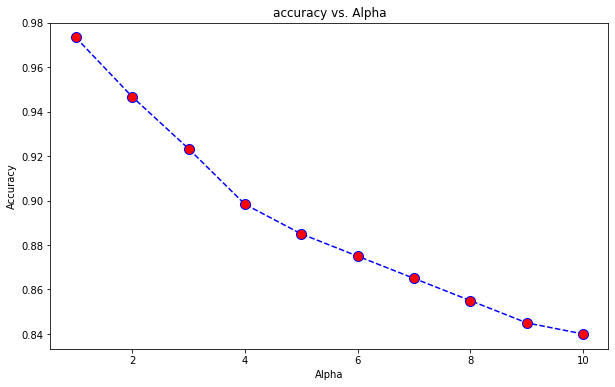

In [115]:
acc = []
alpha = 0.1
for i in range(10):
    
    clf_multiNB_aux = Pipeline([('tfidf',TfidfVectorizer()), ('clf_multiNB', MultinomialNB(alpha=alpha))])
    clf_multiNB_aux.fit(x_train, y_train)
    y_pred_aux = clf_multiNB_aux.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred_aux))
    alpha+=0.1
plt.figure(figsize=(10,6))
plt.plot(range(1,11),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10);
plt.title('accuracy vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at Alpha =",((acc.index(max(acc))+1)/10))

In [123]:
clf_multiNB_mod = Pipeline([('tfidf',TfidfVectorizer()), ('clf_multiNB', MultinomialNB(alpha=0.1))])
clf_multiNB_mod.fit(x_train, y_train)
y_pred_multiNB = clf_multiNB_mod.predict(x_test)
accuracy_score(y_test, y_pred_multiNB)

0.9733333333333334

In [131]:
clf_multiNB_mod.predict(['porn'])

array([1])

In [132]:
confusion_matrix(y_test, y_pred_multiNB)

array([[489,   0],
       [ 16,  95]])

### 5.6 - Support Vector Machines

In [77]:
from sklearn import svm

clf_svm = Pipeline([('tfidf', TfidfVectorizer()),('Svm',svm.SVC())])
clf_svm.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('Svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

Maximum accuracy: 0.9816666666666667 at Kernel = sigmoid


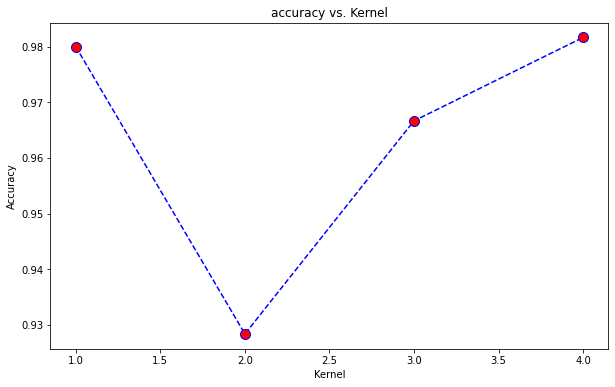

In [120]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
acc = []
for i in range(len(kernels)):
    
    clf_svm_aux = Pipeline([('tfidf', TfidfVectorizer()),('Svm',svm.SVC(kernel=kernels[i]))])
    clf_svm_aux.fit(x_train, y_train)
    y_pred_aux = clf_svm_aux.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred_aux))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,5),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10);
plt.title('accuracy vs. Kernel')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at Kernel =",kernels[(acc.index(max(acc)))])

In [134]:
clf_svm_mod = Pipeline([('tfidf', TfidfVectorizer()),('Svm',svm.SVC(kernel='sigmoid'))])
clf_svm_mod.fit(x_train, y_train)
y_pred_svm = clf_svm_mod.predict(x_test)
accuracy_score(y_test, y_pred_svm)

0.9816666666666667

In [135]:
clf_svm_mod.predict(['porn'])

array([0])

In [136]:
confusion_matrix(y_test, y_pred_svm)

array([[489,   0],
       [ 11, 100]])

##6.- Cross Validation
### Aplicamos cross validation para cada modelo 

In [81]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc

In [225]:
names = ['KNN', 'LR', 'XGB', 'Rndm Frst', 'Multi NB', 'SVM']

In [218]:
def get_measures(modelo):
  scorings = ['accuracy', 'f1', 'precision', 'recall','roc_auc']
  cv_modelo = cross_validate(modelo, x,y, scoring=scorings, cv=10, return_train_score = False)
  measures = []
  for i in range(len(scorings)-1):
    measures.append((cv_modelo['test_' + scorings[i]].mean(), scorings[i]))

  return measures

In [231]:
def graphROC(y_pred, modelo):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title("ROC (TFP vs TVP) - " + modelo)
  plt.legend(loc="lower right")
  plt.show()

### 6.1 - K-Nearest Neighbors Model

In [219]:
knnMeasures = get_measures(clf_knn_mod)

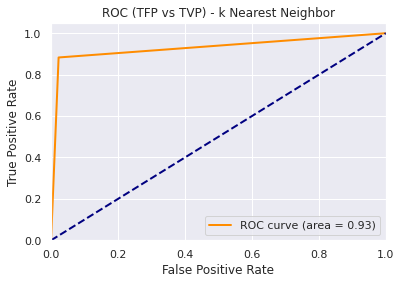

In [232]:
graphROC(y_pred_KNN, 'k Nearest Neighbor')

### 6.2 - Logistic Regression

In [220]:
lrMeasures = get_measures(clf_lr_mod)

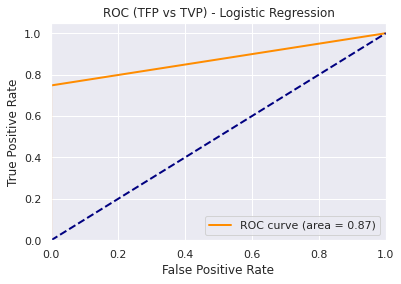

In [238]:
graphROC(y_pred_lr,'Logistic Regression')

### 6.3 - XGBoost Model


In [221]:
xgbMeasures = get_measures(clf_xgb_mod)

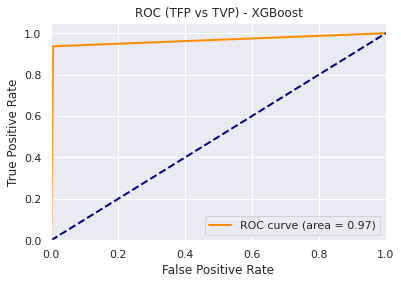

In [234]:
graphROC(y_pred_XGB, 'XGBoost')

### 6.4 - Random Forest

In [222]:
rfstMeasures = get_measures(clf_rfst_mod)

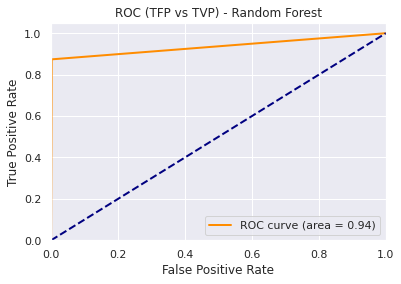

In [235]:
graphROC(y_pred_rfst, 'Random Forest')

### 6.5 - Multinomial Naive Bayes

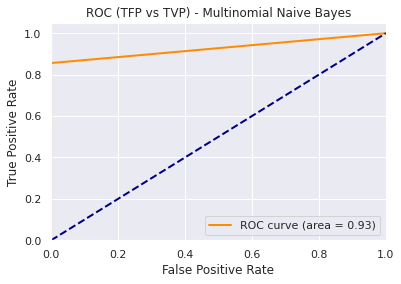

In [236]:
graphROC(y_pred_multiNB, 'Multinomial Naive Bayes')

In [223]:
multiNBMeasures = get_measures(clf_multiNB_mod)

### 6.6 - Support Vector Machines

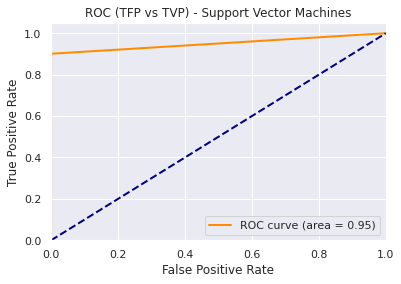

In [237]:
graphROC(y_pred_svm, 'Support Vector Machines')

In [224]:
svmMeasures = get_measures(clf_svm_mod)

### 6.7 - Gráficos comparativos

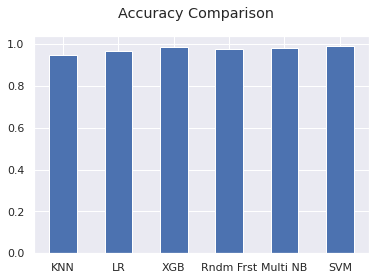

In [226]:
fig = plt.figure()

fig.suptitle("Accuracy Comparison")
ax = fig.add_subplot()

accuracy = [knnMeasures[0][0],lrMeasures[0][0],xgbMeasures[0][0],rfstMeasures[0][0],multiNBMeasures[0][0],svmMeasures[0][0]]
ax.bar(names,accuracy, width=0.5)
plt.show()

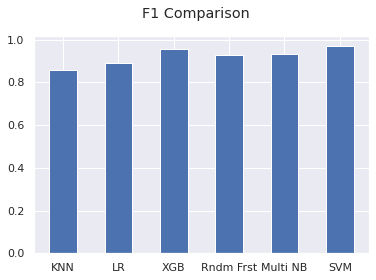

In [227]:
fig = plt.figure()

fig.suptitle("F1 Comparison")
ax = fig.add_subplot()

accuracy = [knnMeasures[1][0],lrMeasures[1][0],xgbMeasures[1][0],rfstMeasures[1][0],multiNBMeasures[1][0],svmMeasures[1][0]]
ax.bar(names,accuracy, width=0.5)
plt.show()

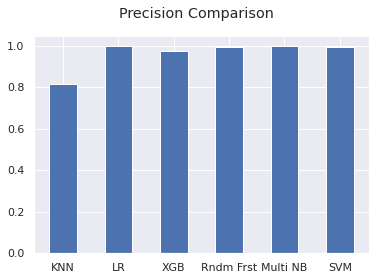

In [228]:
fig = plt.figure()

fig.suptitle("Precision Comparison")
ax = fig.add_subplot()

accuracy = [knnMeasures[2][0],lrMeasures[2][0],xgbMeasures[2][0],rfstMeasures[2][0],multiNBMeasures[2][0],svmMeasures[2][0]]
ax.bar(names,accuracy, width=0.5)
plt.show()

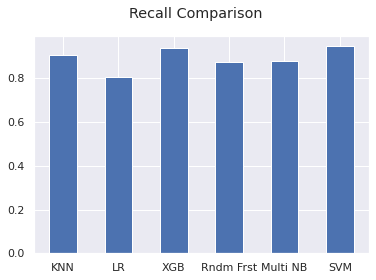

In [230]:
fig = plt.figure()

fig.suptitle("Recall Comparison")
ax = fig.add_subplot()

accuracy = [knnMeasures[3][0],lrMeasures[3][0],xgbMeasures[3][0],rfstMeasures[3][0],multiNBMeasures[3][0],svmMeasures[3][0]]
ax.bar(names,accuracy, width=0.5)
plt.show()

## 7.- K-Means Clustering Algorithm

In [143]:
from sklearn.cluster import KMeans
import numpy as np

In [178]:
kmeans = KMeans(n_clusters=2).fit(x_train_df)

In [179]:
labs = kmeans.labels_
accuracy_score(y_train, labs)

0.46269278866194247

Text(89.18, 0.5, 'Etiqueta Predicha')

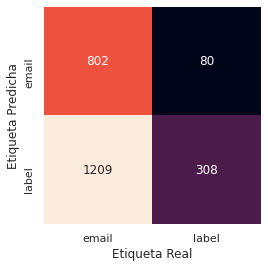

In [180]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(y_train, labs)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=list(df.columns), yticklabels=list(df.columns))
plt.xlabel('Etiqueta Real')
plt.ylabel('Etiqueta Predicha')

In [184]:
pca2 = PCA(n_components=2)
principalComponents2 = pca.fit_transform(x_train_df)
x_train_w_pca2 = pd.DataFrame(data = principalComponents2)

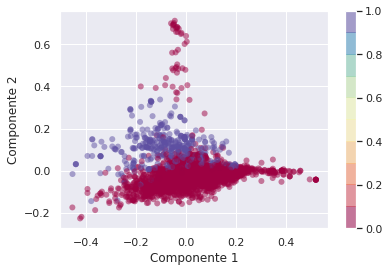

In [185]:
plt.scatter(x_train_w_pca2.iloc[:,0], x_train_w_pca2.iloc[:,1], c=y_train, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar();